# Imports

In [1]:
%matplotlib inline
import glob
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pyvie as pv
import statsmodels.api as sm

# Profile Plots

### Convenience Functions

In [74]:
def get_xs(nx, xlo, xhi):
    dx = (xhi-xlo)/nx
    xs = xlo + np.linspace(0.5*dx, (nx-0.5)*dx, num=nx)
    return xs
    
    
def get_ts(dt, nt):
    ts = np.linspace(0, nt*dt, num=nt+1)
    return ts


def get_fields(fn, cvo=True):
    """Given an output file that may or may not hold the conserved variables, 
    return the fields.
    
    Parameters
    ----------
    fn : string
        File name from which to get the field variables.
    cvo : bool, optional
        Whether the variable holds conserved fields or primal fields.
        
    Returns
    -------
    vdict : dict of np.ndarray
        A dictionary of fields, keys corresponding to the field names.\
    """
    datf = np.load(fn)
    out_dict = {}
    out_dict['n'] = datf['n']
    if cvo:
        out_dict['nu'] = datf['nu']
        out_dict['u'] = np.divide(datf['nu'], datf['n'],
                                   out=np.zeros_like(datf['nu']),
                                   where=datf['nu']!=0.0)
    else:
        out_dict['u'] = datf['u']
        out_dict['nu'] = datf['u']*datf['n']
    return out_dict


def plot_profiles(cases, xs, ts, bfn):
    clabs = list(cases.keys())
    pvars = list(cases[clabs[0]].keys())
    for i in range(len(ts)):
        plt.close('all')
        f, axs = plt.subplots(len(pvars), 1, sharey=False, sharex=True)
        for cl in clabs:
            axs[0].plot(xs, cases[cl][pvars[0]][i,:], label=cl)
            axs[0].legend()
            axs[0].set_ylabel(pvars[0])
        for j in range(1, len(pvars)):
            for cl in clabs:
                axs[j].plot(xs, cases[cl][pvars[0]][i,:])
            axs[j].set_ylabel(pvars[j])
        axs[len(pvars)-1].set_xlabel('x')
        f.suptitle('Spatial Profile At t=%.1f' % ts[i])
        ofn = '%s%06d.png' % (bfn, i)
        plt.savefig(ofn)

### Main

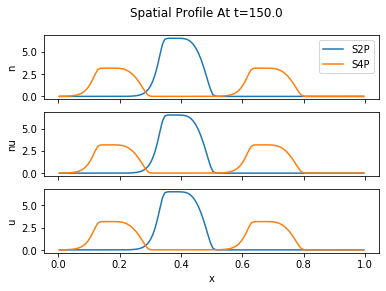

In [76]:
fn1 = 'data/HydroData/'

ics = ['S2P', 'S4P']

xs = get_xs(128, 0, 1.0)
ts = get_ts(0.1, 1500)

cases = {}

for ic in ics:
    dfn = 'data/HydroData/%s/N128/NtmNoneIc1CvGrid.npz' % ic
    fields = get_fields(dfn)
    for k in fields.keys():
        fields[k] = np.flipud(fields[k])
    cases[ic] = fields
    
    
plot_profiles(cases, xs, ts, 'NoneIc1Prof')  

# Space-Time Plots

## Convenience Functions

In [8]:
def get_xs(nx, xlo, xhi):
    dx = (xhi-xlo)/nx
    xs = xlo + np.linspace(0.5*dx, (nx-0.5)*dx, num=nx)
    return xs
    
    
def get_ts(dt, nt):
    ts = np.linspace(0, nt*dt, num=nt+1)
    return ts


def get_fields(fn, cvo=True):
    """Given an output file that may or may not hold the conserved variables, 
    return the fields.
    
    Parameters
    ----------
    fn : string
        File name from which to get the field variables.
    cvo : bool, optional
        Whether the variable holds conserved fields or primal fields.
        
    Returns
    -------
    vdict : dict of np.ndarray
        A dictionary of fields, keys corresponding to the field names.\
    """
    datf = np.load(fn)
    out_dict = {}
    out_dict['n'] = datf['n']
    if cvo:
        out_dict['nu'] = datf['nu']
        out_dict['u'] = np.divide(datf['nu'], datf['n'],
                                   out=np.zeros_like(datf['nu']),
                                   where=datf['nu']!=0.0)
    else:
        out_dict['u'] = datf['u']
        out_dict['nu'] = datf['u']*datf['n']
    return out_dict


def plot_vspacetime(x, t, vs, labels, cmaps, fn):
	"""Generate a plot from  arrays in `vs`.

	This function takes a two arrays specifying a spatial and temporal domain,
	and plots each of the associated 2d fields in `vs` as functions of these
	variables and saves the result to disk. 

	Parameters
    ----------
	x : array_like
		A 1d set of spatial points. 
	t : array_like
		A 1d  set of temporal points.
	vs : array_like
		A set of arrays with each satisfying v[i].shape = (t.shape[0],x.shape[0])
	labels : list of str
		Name associated with each field in `vs`.
	fn : str
		Name of file to save figure to. 
	"""
	plt.close('all')
	f, axs = plt.subplots(1,len(vs),sharey=True)
	for i in range(len(vs)):
		dx = 0.5*(x[-1]-x[0])
		dt = 0.5*(t[-1]-t[0])
		#extent = [x[0]-dx, x[-1]+dx, t[0], t[-1]]
		#imi = axs[i].imshow(vs[i], extent=extent)
		#import pdb
		#pdb.set_trace()
		imi = axs[i].imshow(vs[i], cmap=cmaps[i], aspect='auto', extent=[0, x[-1], 0, t[-1]])
		f.colorbar(imi, ax=axs[i])
		if i == 0:
			axs[i].set_ylabel('t')
			axs[i].set_xlabel('x')
		axs[i].set_title(labels[i])
	plt.savefig(fn)

## Params

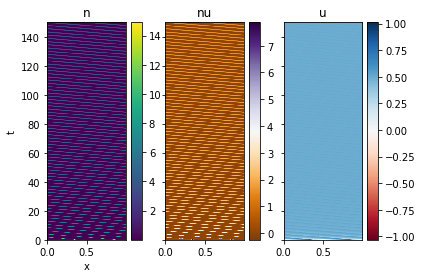

In [71]:
cmaps = ['viridis', 'PuOr', 'RdBu']

fn1 = 'data/HydroData/'

ics = ['S2P', 'S4P']

for ic in ics:
    dfn = 'data/HydroData/%s/N128/NtmNoneIc1CvGrid.npz' % ic
    ofn = 'NoneIc1N128%s.png' % ic
    fields = get_fields(dfn)
    xs = get_xs(128, 0, 1.0)
    ts = get_ts(0.1, 1500)
    vlist = []
    labs = []
    for k in fields.keys():
        vlist.append(fields[k])
        labs.append(k)
    plot_vspacetime(xs, ts, vlist, labs, cmaps, ofn)

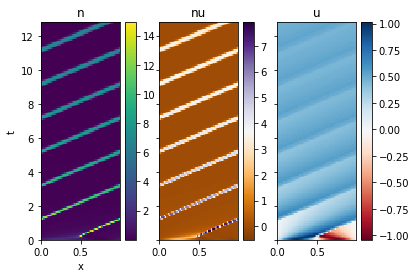

In [28]:
cmaps = ['viridis', 'PuOr', 'RdBu']

fn1 = 'data/HydroData/'

ics = ['S2P', 'S4P']

dfnt = 'data/NtmNoneIc1CvGrid.npz'
#ofn = 'NoneIc1N128%s.png' % ic
ofn = 'test.png'
fields2 = get_fields(dfnt)
xs = get_xs(64, 0, 1.0)
ts2 = get_ts(0.1, 128)
vlist = []
labs = []
for k in fields.keys():
    vlist.append(fields2[k])
    labs.append(k)
plot_vspacetime(xs, ts2, vlist, labs, cmaps, ofn)

In [23]:
dfn = 'data/HydroData/S2P/N64/NtmNoneIc1CvGrid.npz'

fields1 = get_fields(dfn)

In [38]:
fields1['u'][-1]

array([ 0.04906767,  0.14673047,  0.24298018,  0.33688985,  0.42755509,
        0.51410274,  0.5956993 ,  0.67155895,  0.74095113,  0.80320753,
        0.85772861,  0.90398929,  0.94154407,  0.97003125,  0.98917651,
        0.99879546,  0.99879546,  0.98917651,  0.97003125,  0.94154407,
        0.90398929,  0.85772861,  0.80320753,  0.74095113,  0.67155895,
        0.5956993 ,  0.51410274,  0.42755509,  0.33688985,  0.24298018,
        0.14673047,  0.04906767, -0.04906767, -0.14673047, -0.24298018,
       -0.33688985, -0.42755509, -0.51410274, -0.5956993 , -0.67155895,
       -0.74095113, -0.80320753, -0.85772861, -0.90398929, -0.94154407,
       -0.97003125, -0.98917651, -0.99879546, -0.99879546, -0.98917651,
       -0.97003125, -0.94154407, -0.90398929, -0.85772861, -0.80320753,
       -0.74095113, -0.67155895, -0.5956993 , -0.51410274, -0.42755509,
       -0.33688985, -0.24298018, -0.14673047, -0.04906767])

In [42]:
fields2['n'].shape

(129, 64)

In [59]:
fields1['n'].shape

(1501, 64)

In [60]:
1500-128

1372

In [61]:
fields1['n'][1372:,:].shape

(129, 64)

In [62]:
fields1['n'][1372:,:]-fields2['n']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Standard HMM Error

In [3]:
from params import micro_solvers, hmm_solvers, hmm_svals, closures, icsuf, ics,\
gNx, gtNt, gdt, gcfl, gxlo, gxhi, gtio, gtcvo, gtcvsuf

In [4]:
from plots import plot_vspacetime

In [5]:
dx = (gxhi-gxlo)/gNx
xs = gxlo + np.linspace(0.5*dx, (gNx-0.5)*dx, num=gNx)
ts = np.linspace(0, gtNt*gdt, num=gtNt+1)

data/RmNoneIc1CvGrid.npz
data/RmNoneIc2CvGrid.npz
data/RmNoneIc3CvGrid.npz
data/RmPressIc1CvGrid.npz
data/RmPressIc2CvGrid.npz
data/RmPressIc3CvGrid.npz
data/RmAdIc1CvGrid.npz
data/RmAdIc2CvGrid.npz
data/RmAdIc3CvGrid.npz


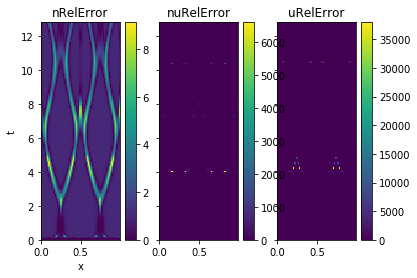

In [11]:
#generate the error fields, and plot them in space time

for sk in micro_solvers.keys():
    for c in closures:
        for i in ics:
            micro_fn = 'data/%s%s%s%sGrid.npz' % (sk, c, icsuf[i], gtcvsuf)
            print(micro_fn)
            micro_dat = np.load(micro_fn)
            mvlist = []
            mvlabs = []
            for k in micro_dat.keys():
                mvlist.append(micro_dat[k])
                mvlabs.append(k)
            mvlist.append(np.divide(micro_dat['nu'], micro_dat['n'],
                                   out=np.zeros_like(micro_dat['nu']),
                                   where=micro_dat['nu']!=0.0))
            mvlabs.append('u')
            for hsk in hmm_solvers.keys():
                for s in hmm_svals:
                    hmm_fn = 'data/%s%d%s%s%sGrid.npz' % (hsk, s, c, icsuf[i], gtcvsuf)
                    hmm_dat = np.load(hmm_fn)
                    hmlist = []
                    hmlabs = []
                    for k in hmm_dat.keys():
                        hmlist.append(hmm_dat[k])
                        hmlabs.append(k)
                    hmlist.append(np.divide(hmm_dat['nu'], hmm_dat['n'],
                                   out=np.zeros_like(hmm_dat['nu']),
                                   where=hmm_dat['nu']!=0.0))
                    errs = []
                    elabs = []
                    for k in range(len(mvlist)):
                        errs.append(np.abs(mvlist[k]-hmlist[k])/(np.abs(mvlist[k]) + np.finfo(np.float64).eps))
                        estring = '%sRelError' % mvlabs[k]
                        elabs.append(estring)
                    ofn = 'Hmm%s%s%sL%dRelErr.png' % (sk, c, icsuf[i], s)
                    plot_vspacetime(xs, ts, errs, elabs, ofn)

# Var Convergence Plots

## Convenience

In [82]:
def get_fields(fn, cvo=True):
    """Given an output file that may or may not hold the conserved variables, 
    return the fields.
    
    Parameters
    ----------
    fn : string
        File name from which to get the field variables.
    cvo : bool, optional
        Whether the variable holds conserved fields or primal fields.
        
    Returns
    -------
    vdict : dict of np.ndarray
        A dictionary of fields, keys corresponding to the field names.\
    """
    datf = np.load(fn)
    out_dict = {}
    out_dict['n'] = datf['n']
    if cvo:
        out_dict['nu'] = datf['nu']
        out_dict['u'] = np.divide(datf['nu'], datf['n'],
                                   out=np.zeros_like(datf['nu']),
                                   where=datf['nu']!=0.0)
    else:
        out_dict['u'] = datf['u']
        out_dict['nu'] = datf['u']*datf['n']
    return out_dict



def gen_lag_plot(fn, maxlags, title, ofn, T0, dT):
    #probably the ugliest function I've written tbh. 
    ddict = get_fields(fn)
    ncells = np.flip(np.arange(2, ddict['u'].shape[1]+1))
    nlags = np.arange(2, maxlags+1)
    svals = {}
    evals = {}
    gemin = 1000
    gemax = 0
    for f in ddict.keys():
        stable = np.zeros((ncells.shape[0], nlags.shape[0]), dtype=np.bool)
        err = np.zeros((ncells.shape[0], nlags.shape[0]), dtype=np.float64)
        for i in range(len(ncells)):
            nc = ncells[i]
            arr = np.flipud(ddict[f])[T0:T0+dT,0:nc]
            vmodel = sm.tsa.VAR(arr)
            for j in range(len(nlags)):
                nl = nlags[j]
                vfit= vmodel.fit(nl)
                if vfit.is_stable():
                    stable[i,j] = True
                    #get max error.
                    var_ic = np.flipud(ddict[f])[T0+dT-vfit.k_ar:T0+dT,0:nc]
                    true_dat = np.flipud(ddict[f])[T0+dT:, 0:nc]
                    var_dat = vfit.forecast(var_ic, true_dat.shape[0])
                    err[i,j] = np.max(np.abs(true_dat-var_dat)/(np.abs(true_dat)+np.finfo(np.float64).eps))
        if np.min(err[stable==True])<gemin:
            gemin=np.min(err[stable==True])
        if np.max(err[stable==True])>gemax:
            gemax=np.max(err[stable==True])          
        svals[f] = stable
        evals[f] = err
    plt.close('all')
    f, axs = plt.subplots(1, len(ddict.keys()), sharey=True, figsize=(18, 4*len(ddict.keys())))
    keys = list(ddict.keys())
    for i in range(len(keys)):
        im = np.ma.masked_where(svals[keys[i]]==False, evals[keys[i]], copy=False)
        cb = axs[i].imshow(im, cmap=plt.cm.viridis, norm=colors.LogNorm(),
                          interpolation='none', vmin=gemin, vmax=gemax, origin='upper',
                          extent=[1.5, maxlags+0.5, 0.5, ncells[0]+0.5],
                          )
        axs[i].set_title('%s' % keys[i])
        if i == 0:
            axs[i].set_xlabel('nlags')
            axs[i].set_ylabel('ncells')
        if i == len(keys)-1:
            cbar = f.colorbar(cb, ax=axs.ravel().tolist())
            cbar.ax.set_ylabel('Max Rel. Error', rotation=-90)
    f.suptitle(title)
    plt.savefig(ofn)

## Iterables

In [88]:
fbase = 'data/HydroData'
ictype = ['S2P', 'S4P']
res = ['N32', 'N64','N128']
closure = ['Ad', 'Press', 'None']
ic = ['Ic1', 'Ic2','Ic3']

cd = {'N32':32,'N64':64,'N128':128}

nlags_max = 15
T0 = 10
dT = 500

## Main

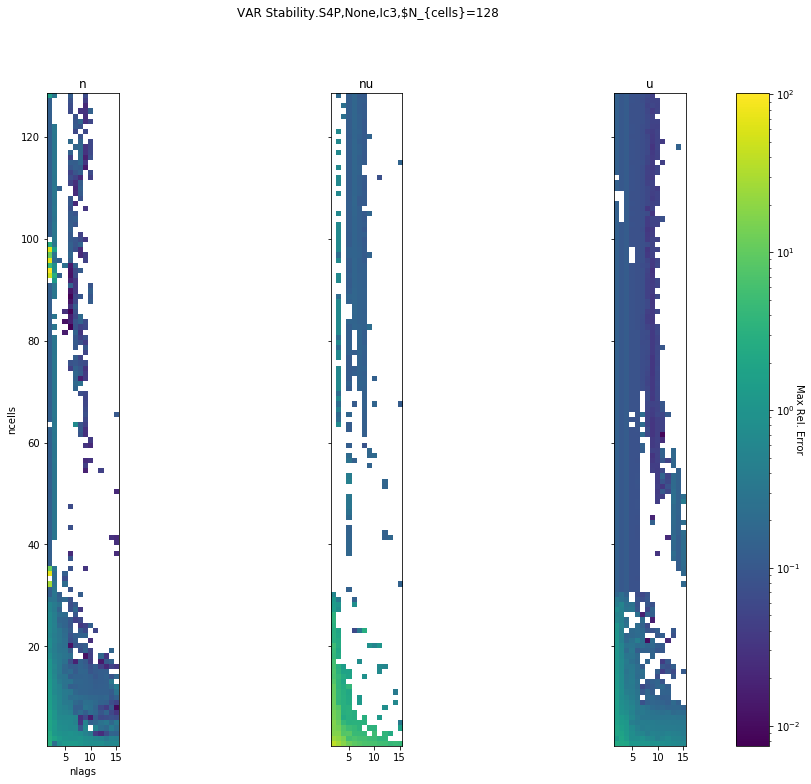

In [89]:
for ict in ictype:
    for r in res:
        for c in closure:
            for i in ic:
                fn = '%s/%s/%s/Ntm%s%sCvGrid.npz' % (fbase, ict, r, c, i)
                title = r'VAR Stability.%s,%s,%s,$N_{cells}=%d' % (ict, c, i, cd[r])
                ofn = 'VStab%s%s%s%s.png' % (c, ict, i, r)
                gen_lag_plot(fn, nlags_max, title, ofn, T0, dT)